In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Delete rows with 2 or more NaN values

In [6]:
df = df[~(df.isna().sum(axis=1) >= 2)]

Percentage of nan values in features

In [7]:
((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)

Sulfate            20.474968
ph                 11.617458
Trihalomethanes     3.369705
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2754.000000,3116.000000,3116.000000,3116.000000,2478.000000,3116.000000,3116.000000,3011.000000,3116.000000,3116.000000
mean,7.078708,196.469240,22031.185814,7.116457,333.699670,426.721245,14.286294,66.396269,3.967872,0.391849
std,1.593966,32.929793,8773.114249,1.585754,41.308045,81.154820,3.302108,16.154475,0.782636,0.488241
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.090358,176.856266,15676.257836,6.123896,307.673973,365.811312,12.069738,55.810006,3.439540,0.000000
50%,7.037422,197.167238,20921.203012,7.116262,333.073455,422.229331,14.229935,66.608891,3.958951,0.000000
75%,8.062621,216.667456,27358.507325,8.106119,359.901349,482.446752,16.553701,77.335028,4.502519,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,27.006707,124.000000,6.739000,1.000000


## Predicting arce_lot and filling NA values base on predictions

### 1. For Trihalomethanes

In [9]:
df.isna().sum().sort_values(ascending=False)

Sulfate            638
ph                 362
Trihalomethanes    105
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

Creating values to future predict

In [10]:
missing_values = df[df["Trihalomethanes"].isna()]
predict_values = missing_values.drop(["Trihalomethanes"], axis=1)

We will start with a featues with the smallest number of NA values

In [11]:
new_df = df[df["Trihalomethanes"].notna()]

Delete other rows with NaN values

In [12]:
new_df = df[~(df.isna().sum(axis=1) >= 1)]

Feature Selection 

In [13]:
X = new_df.drop(columns=["Trihalomethanes"])
y = new_df["Trihalomethanes"]

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Define TrainProcessV1 which we will use to train

In [15]:
def TrainProcessV1(X, y):
    rfr = RandomForestRegressor()
    param_grid_rfr = {"n_estimators":[72, 100, 128], "max_features":[1,2,3], "random_state": [8]}
    grid_rfr = GridSearchCV(rfr, param_grid_rfr)
    predictor = grid_rfr.fit(X, y) 
    print(grid_rfr.best_estimator_.get_params())
    y_pred_rfr = grid_rfr.predict(X)
    return y_pred_rfr, predictor      

In [16]:
y_pred_rfr, predictor = TrainProcessV1(X, y)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8, 'verbose': 0, 'warm_start': False}


In [17]:
y_pred_rfr

array([86.11625115, 43.53564709, 61.09458114, ..., 52.41754224,
       63.44891076, 65.11831046])

Predicting rows with NA values

In [18]:
predicted_val = predictor.predict(predict_values)

Filling  na data with predicted values

In [19]:
df.loc[df['Trihalomethanes'].isna(), 'Trihalomethanes'] = predicted_val

In [20]:
df.isna().sum().sort_values(ascending=False)

Sulfate            638
ph                 362
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

### 2. For ph                 

Do the same steps as above but only using RandomForestRegressor

In [21]:
missing_values = df[df["ph"].isna()]
predict_values = missing_values.drop(["ph"], axis=1)

In [22]:
new_df = df[df["ph"].notna()]

In [23]:
new_df = df[~(df.isna().sum(axis=1) >= 1)]

In [24]:
X = new_df.drop(columns=["ph"])
y = new_df["ph"]

In [25]:
y_pred_rfr, predictor = TrainProcessV1(X, y)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 128, 'n_jobs': None, 'oob_score': False, 'random_state': 8, 'verbose': 0, 'warm_start': False}


In [26]:
predicted_val = predictor.predict(predict_values)

In [27]:
df.loc[df['ph'].isna(), 'ph'] = predicted_val

In [28]:
df.isna().sum().sort_values(ascending=False)

Sulfate            638
ph                   0
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

### 3. For Sulfate       

In [29]:
missing_values = df[df["Sulfate"].isna()]
predict_values = missing_values.drop(["Sulfate"], axis=1)

In [30]:
new_df = df[df["Sulfate"].notna()]

In [31]:
X = new_df.drop(columns=["Sulfate"])
y = new_df["Sulfate"]

In [32]:
y_pred_rfr, predictor = TrainProcessV1(X, y)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 128, 'n_jobs': None, 'oob_score': False, 'random_state': 8, 'verbose': 0, 'warm_start': False}


In [33]:
predicted_val = predictor.predict(predict_values)

In [34]:
df.loc[df['Sulfate'].isna(), 'Sulfate'] = predicted_val

In [35]:
df.isna().sum().sort_values(ascending=False)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Visualization and cleaning of data in filled df

In [36]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.437596,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,332.896098,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,328.703719,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,9.419510,175.762646,33155.578218,7.350233,328.856845,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,341.348826,402.883113,11.168946,77.488213,4.708658,1


Visualize each function as a boxplot to see if there are outliers

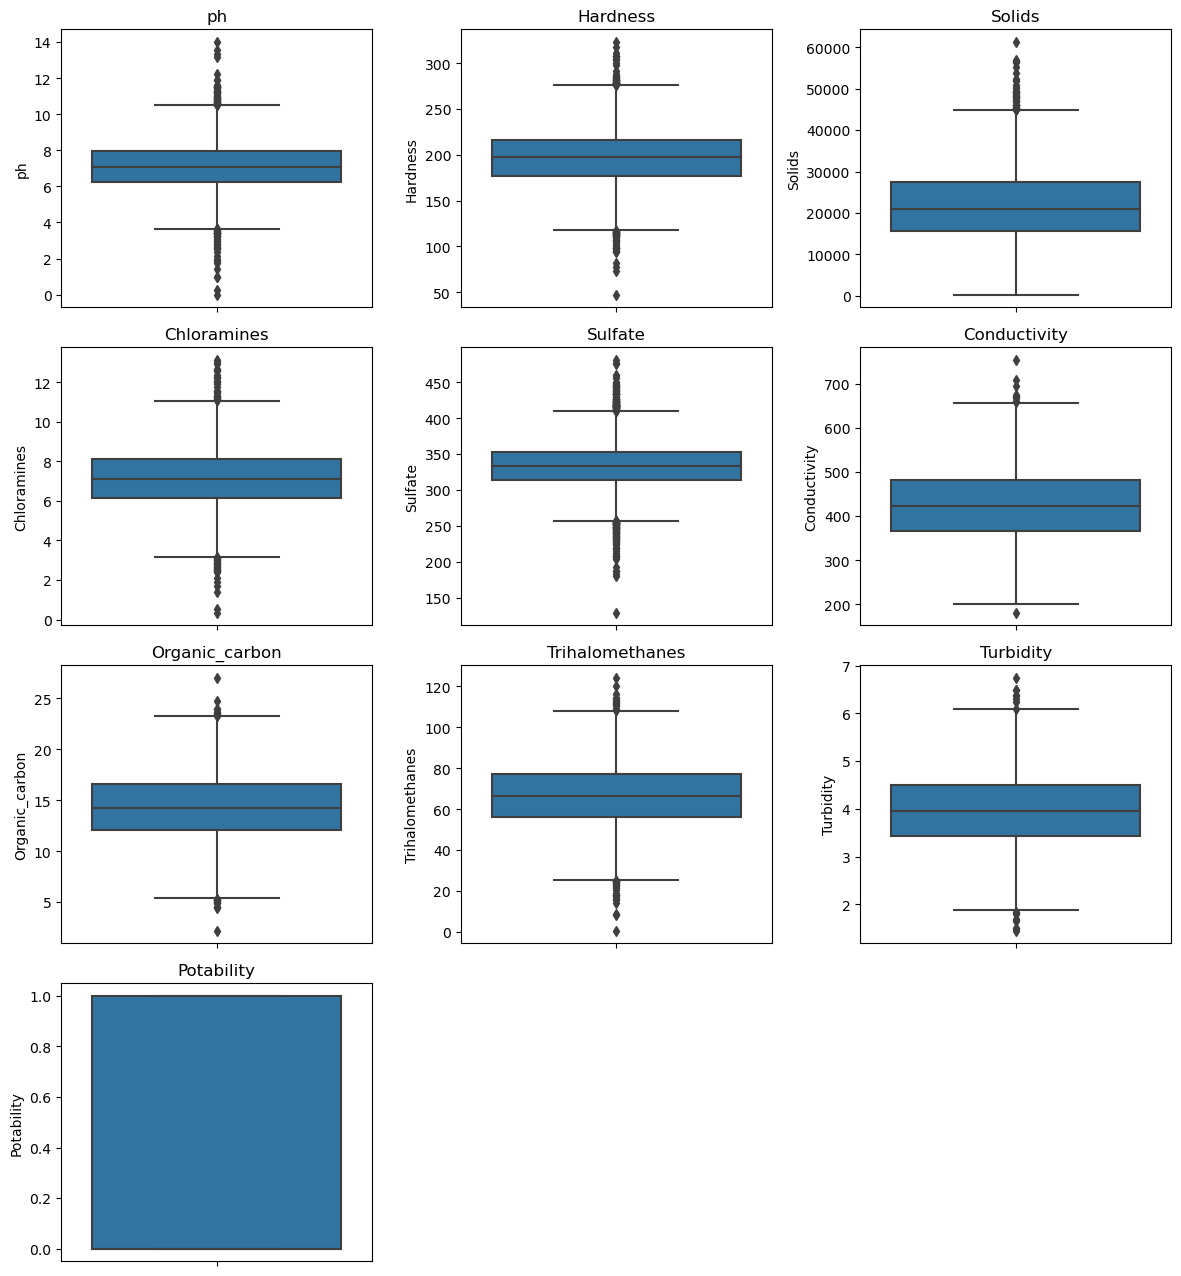

In [37]:
plt.figure(figsize=(12, 16))  

# Loop through each column and create a boxplot 
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(5, 3, df.columns.get_loc(column) + 1)
        sns.boxplot(y=df[column])
        plt.title(column)

plt.tight_layout()
plt.show()

Removing outliers for each feature

In [38]:
for column in range(len(df.columns)):
    q75, q25 = np.percentile(df[df.columns[column]], [75, 25])
    iqr = q75 - q25
    iqrMin = q25 - (iqr * 1.5)
    iqrMax = q75 + (iqr * 1.5)
    print(df.columns[column])
    print(f"iqrMin {iqrMin}")
    print(f"iqrMax {iqrMax}")
    print(f"count IqrMin: {len(df[df[df.columns[column]] < iqrMin])}")
    print(f"count IqrMax: {len(df[df[df.columns[column]] > iqrMax])}")
    df = df.drop(df[df[df.columns[column]] < iqrMin].index, axis=0)
    df = df.drop(df[df[df.columns[column]] > iqrMax].index, axis=0)

ph
iqrMin 3.6366501358669745
iqrMax 10.51913934408808
count IqrMin: 40
count IqrMax: 48
Hardness
iqrMin 118.01568447092639
iqrMax 275.8694494750982
count IqrMin: 37
count IqrMax: 34
Solids
iqrMin -1621.6647722791695
iqrMax 44492.42605162091
count IqrMin: 0
count IqrMax: 41
Chloramines
iqrMin 3.183439393644369
iqrMax 11.047446693509501
count IqrMin: 25
count IqrMax: 27
Sulfate
iqrMin 258.13700737524454
iqrMax 409.2271620164874
count IqrMin: 66
count IqrMax: 81
Conductivity
iqrMin 190.91053758904968
iqrMax 657.3767701083464
count IqrMin: 1
count IqrMax: 8
Organic_carbon
iqrMin 5.354640904634763
iqrMax 23.326290734152664
count IqrMin: 9
count IqrMax: 8
Trihalomethanes
iqrMin 25.222239485948315
iqrMax 108.37500663278962
count IqrMin: 22
count IqrMax: 13
Turbidity
iqrMin 1.8314112808612475
iqrMax 6.117877726245822
count IqrMin: 8
count IqrMax: 7
Potability
iqrMin -1.5
iqrMax 2.5
count IqrMin: 0
count IqrMax: 0


Histplot visualization for each function after removing outliers


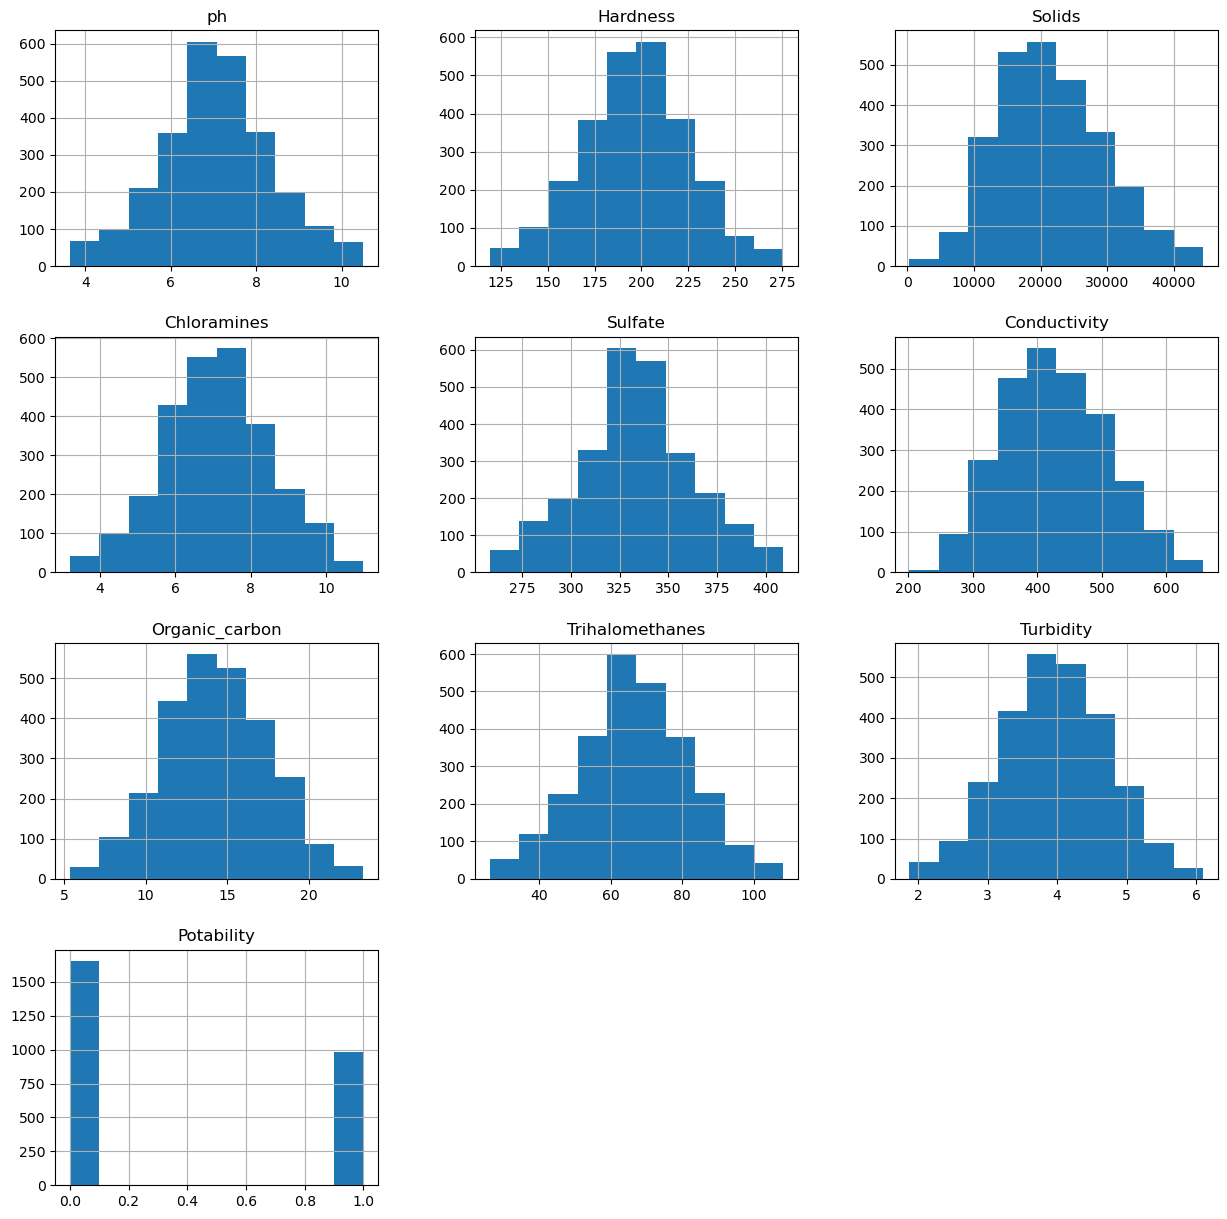

In [39]:
df.hist(figsize=(15,15))
plt.show()

Checking correlation between features

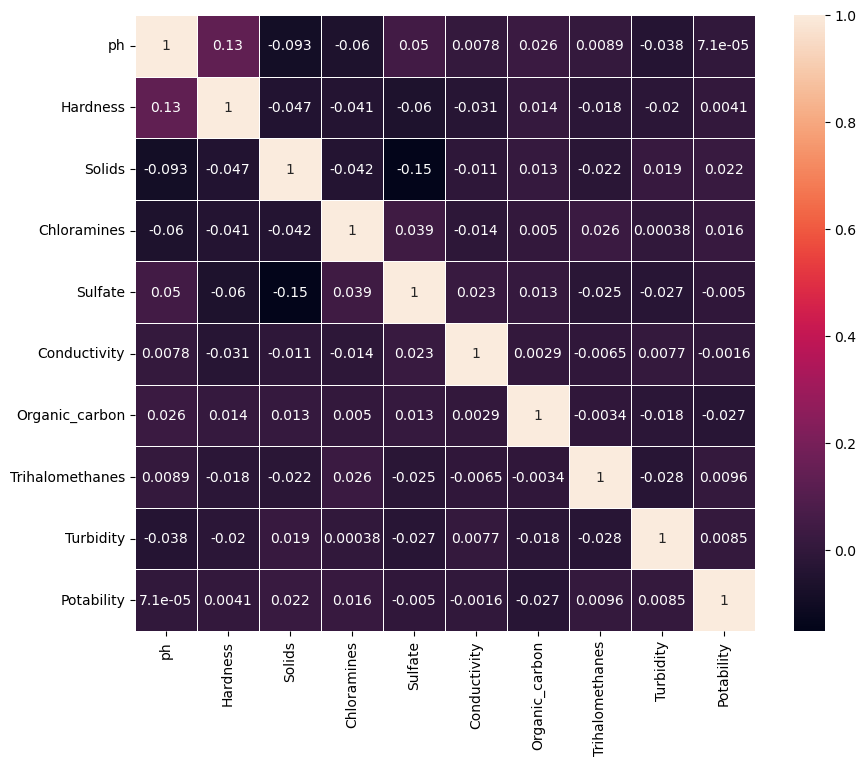

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5);

We have a really low corellation in this dataset

### Dealing with Imbalanced Classes

In [41]:
X = df.drop(columns = ["Potability"])
y = df.Potability

In [42]:
y.value_counts()

0    1656
1     985
Name: Potability, dtype: int64

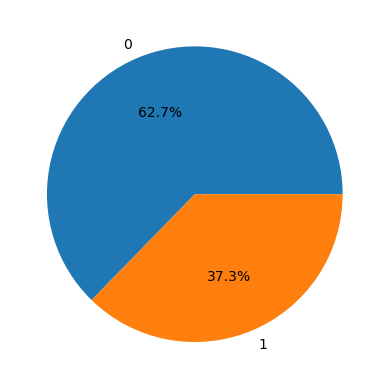

In [43]:
plt.pie(x=y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%')
plt.show() 

In [44]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [45]:
counter = Counter(y)
print(counter)

Counter({0: 1656, 1: 985})


Using SMOTE to generate synthetic samples for class 1 until reach 1200

I want to increase the class by 30%

In [46]:
smote = SMOTE(sampling_strategy={1: int((985 * 1/10) * 3 + 985) })
X_resampled, y_resampled = smote.fit_resample(X, y)

In [47]:
y_resampled.value_counts()

0    1656
1    1280
Name: Potability, dtype: int64

#### How SMOTE works:

1. Identify Minority Class Instances - SMOTE starts by identifying instances belonging to the minority class. In your case, the minority class is class 1 with 985 samples.


2. Select a Minority Instance - SMOTE randomly selects a minority instance from the dataset.

3. Find Nearest Neighbors - For the selected instance, SMOTE identifies its k-nearest neighbors.

4. Generate Synthetic Samples - SMOTE then creates synthetic samples by interpolating between the selected instance and its neighbors. It does this by selecting one or more neighbors and creating synthetic samples along the line segments connecting them.
5. Repeat the Process - Steps 2-4 are repeated until the desired number of synthetic samples is generated to reach the specified target number of samples for the minority class.

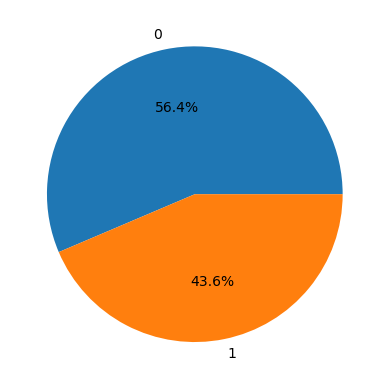

In [48]:
plt.pie(x=y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%')
plt.show() 

In [49]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Potability')], axis=1)

In [50]:
df_resampled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.437596,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,332.896098,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,328.703719,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
2931,7.315812,183.763192,30890.121920,6.082327,314.200385,438.287618,14.763782,67.581616,5.012420,1
2932,4.992549,163.964485,14125.940556,6.504180,357.117390,335.836417,21.018750,65.648869,3.311544,1
2933,5.879399,236.624439,21078.750056,8.155110,354.966795,494.085087,13.287992,66.058699,3.960724,1
2934,6.598718,181.655002,9775.232000,8.264254,348.432515,404.099461,12.642312,60.847029,5.123643,1


I dont want to balance the dataset perfectly, as this may cause undesirable results at the end.

## Creating and training models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [53]:
models_params = {
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators":[72, 100, 128], "max_features":[1,2,3], 
                  "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 4, 9]}
        },
    
    "AdaBoostClassifier": {
        "model": AdaBoostClassifier(),
        "params": {"n_estimators":[5, 10, 15, 25, 40, 50], "learning_rate":[0.1, 0.05, 0.2]}
        
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(),
        "params": {"n_estimators":[100, 130, 180, 240], "learning_rate":[0.1, 0.05, 0.2],
                  "max_depth":[3,4,5]}
    }
    
}

In [54]:
scores = []

for model_name, model in models_params.items():
    grid =  GridSearchCV(model['model'], model['params'], return_train_score=False)
    grid.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })

In [55]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.6870933828076685,
  'best_params': {'max_features': 3,
   'min_samples_leaf': 1,
   'min_samples_split': 5,
   'n_estimators': 100}},
 {'model': 'AdaBoostClassifier',
  'best_score': 0.5608596165739024,
  'best_params': {'learning_rate': 0.1, 'n_estimators': 40}},
 {'model': 'GradientBoostingClassifier',
  'best_score': 0.6502958152958154,
  'best_params': {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 130}}]

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [58]:
KNN_C = KNeighborsClassifier()

In [59]:
k_values = list(range(1,20))
param_grid = {"n_neighbors": k_values}
grid_knn = GridSearchCV(KNN_C, param_grid)

In [60]:
grid_knn.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [61]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [62]:
knn_predictions = grid_knn.predict(scaled_X_test)

In [63]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       424
           1       0.58      0.65      0.61       310

    accuracy                           0.65       734
   macro avg       0.65      0.65      0.65       734
weighted avg       0.66      0.65      0.65       734



In [64]:
log_model = LogisticRegression()

In [65]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [66]:
y_pred = log_model.predict(scaled_X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       424
           1       0.33      0.01      0.02       310

    accuracy                           0.57       734
   macro avg       0.45      0.50      0.38       734
weighted avg       0.47      0.57      0.43       734



### Little Conclusion

As we can see, none of the trained models exceed a probability score of 70%. The RandomForestClassifier almost achieves it with a final result of ~0.69. Models encounter difficulties in detecting certain classes. Perhaps, in the dataset, it is challenging to distinguish between classes as some feature values may be very similar to others but belong to different classes. Maybe we should use more parameters to search for an optimal score. However, in the end, the model's results do not provide a clear solution.